<h3> pd.to_datetime method </h3>

Can take any argument such as int, float, str, datetime, list, tuple, 1-d array, Series, DataFrame/dict-like

Amazingly powerful and can convert for any format

In [1]:
import pandas as pd
pd.to_datetime("2019-12-31")

Timestamp('2019-12-31 00:00:00')

In [2]:
pd.to_datetime("2019/12/31")

Timestamp('2019-12-31 00:00:00')

In [3]:
pd.to_datetime("dec 21 2019")

Timestamp('2019-12-21 00:00:00')

In [7]:
pd.to_datetime("dec 21 2019 14:34")

Timestamp('2019-12-21 14:34:00')

In [8]:
pd.to_datetime("3:55pm, Dec 20, 1987")

Timestamp('1987-12-20 15:55:00')

In [14]:
dates = ["21 11 1905 4pm", "31st Dec 2019"]
pd.to_datetime(dates)

/var/folders/zn/6npf5pd5277gbjjtr2b6gy400000gn/T/ipykernel_68891/3656439394.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(dates)


DatetimeIndex(['1905-11-21 16:00:00', '2019-12-31 00:00:00'], dtype='datetime64[ns]', freq=None)

<h3> Using format param in to_datetime method</h3>

In [21]:
pd.to_datetime("10/11/12") #default is monthfirst

Timestamp('2012-10-11 00:00:00')

In [20]:
pd.to_datetime("10/11/12", dayfirst = True)  #python would know that 10th is the 10th of the month and not the 10th month

Timestamp('2012-11-10 00:00:00')

In [22]:
pd.to_datetime("10/11/12", yearfirst = True) ## python would know we are talking about 2010 year

Timestamp('2010-11-12 00:00:00')

In [23]:
## we could even use these together

pd.to_datetime("10/11/12", yearfirst = True, dayfirst=  True)

Timestamp('2010-12-11 00:00:00')

In [24]:
##passing the exact format in which data is passed to to_datetime

In [27]:
pd.to_datetime("10/11/12", format = "%y/%m/%d") ## the list of fomrat descriptives can be found hre - https://www.w3schools.com/python/gloss_python_date_format_codes.asp 

## in this example %y refers to year in 2 digits, and same for month and date

Timestamp('2010-11-12 00:00:00')

In [32]:
meetings = ["Dec 11 2019 Meeting", "Jan 19 2020 Meeting"]
(pd.to_datetime(meetings, format = "%b %d %Y Meeting"))

DatetimeIndex(['2019-12-11', '2020-01-19'], dtype='datetime64[ns]', freq=None)

<h3> Dates and Dataframes</h3>

In [34]:
ufo = pd.read_csv("data/nuforc_reports.csv")
ufo.info()
ufo.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88125 entries, 0 to 88124
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   summary         88095 non-null  object 
 1   city            87888 non-null  object 
 2   state           82890 non-null  object 
 3   date_time       86938 non-null  object 
 4   shape           85627 non-null  object 
 5   duration        84951 non-null  object 
 6   stats           88088 non-null  object 
 7   report_link     88125 non-null  object 
 8   text            88070 non-null  object 
 9   posted          86938 non-null  object 
 10  city_latitude   72013 non-null  float64
 11  city_longitude  72013 non-null  float64
dtypes: float64(2), object(10)
memory usage: 8.1+ MB


,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12T18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22T00:00:00,37.343152,-77.408582


In [35]:
pd.to_datetime(ufo.date_time)

0       2019-12-12 18:43:00
1       2019-03-22 18:30:00
2                       NaT
3       2019-04-17 02:00:00
4       2009-03-15 18:00:00
                ...        
88120   2019-10-02 20:00:00
88121   2019-10-02 20:00:00
88122   2019-10-02 20:03:00
88123   2019-10-02 22:00:00
88124   2019-10-02 22:00:00
Name: date_time, Length: 88125, dtype: datetime64[ns]

In [36]:
## adding a new column to the df

ufo["date"] = pd.to_datetime(ufo.date_time)

ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88125 entries, 0 to 88124
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   summary         88095 non-null  object        
 1   city            87888 non-null  object        
 2   state           82890 non-null  object        
 3   date_time       86938 non-null  object        
 4   shape           85627 non-null  object        
 5   duration        84951 non-null  object        
 6   stats           88088 non-null  object        
 7   report_link     88125 non-null  object        
 8   text            88070 non-null  object        
 9   posted          86938 non-null  object        
 10  city_latitude   72013 non-null  float64       
 11  city_longitude  72013 non-null  float64       
 12  date            86938 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(10)
memory usage: 8.7+ MB


**parse date method while reading the csv**

In [37]:
##we can directly use the parse date method while reading csv to get the right date time

ufo = pd.read_csv("data/nuforc_reports.csv", parse_dates= ["date_time"])
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88125 entries, 0 to 88124
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   summary         88095 non-null  object        
 1   city            87888 non-null  object        
 2   state           82890 non-null  object        
 3   date_time       86938 non-null  datetime64[ns]
 4   shape           85627 non-null  object        
 5   duration        84951 non-null  object        
 6   stats           88088 non-null  object        
 7   report_link     88125 non-null  object        
 8   text            88070 non-null  object        
 9   posted          86938 non-null  object        
 10  city_latitude   72013 non-null  float64       
 11  city_longitude  72013 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 8.1+ MB


<h3> Useful dt properties </h3>

In [39]:
## need to use the dt property to access multiple functionalities in a datetime series

ufo.date_time.dt.year

0        2019.0
1        2019.0
2           NaN
3        2019.0
4        2009.0
          ...  
88120    2019.0
88121    2019.0
88122    2019.0
88123    2019.0
88124    2019.0
Name: date_time, Length: 88125, dtype: float64

<Axes: xlabel='date_time'>

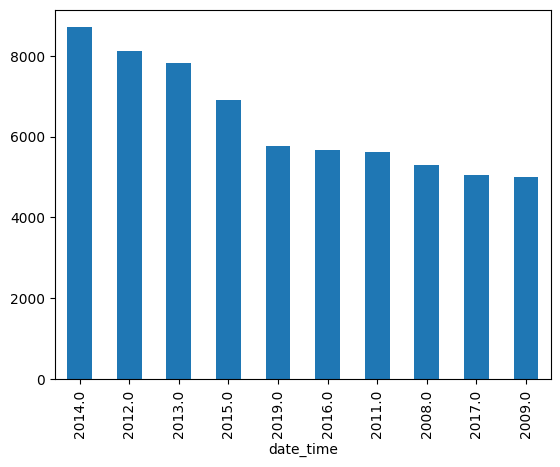

In [42]:
ufo.date_time.dt.year.value_counts().head(10).plot(kind = "bar")

<Axes: xlabel='date_time'>

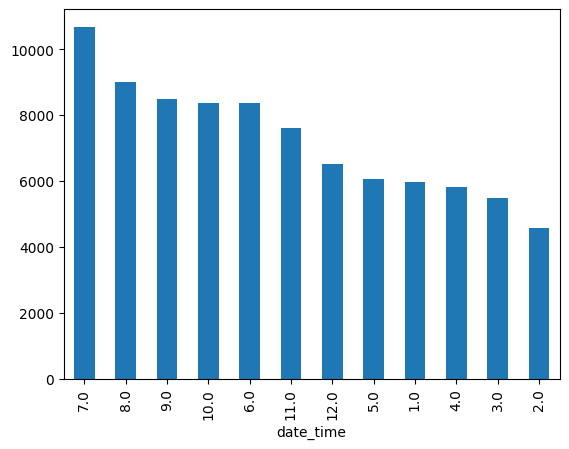

In [44]:
ufo.date_time.dt.month.value_counts().head(12).plot(kind = "bar")

<Axes: xlabel='date_time'>

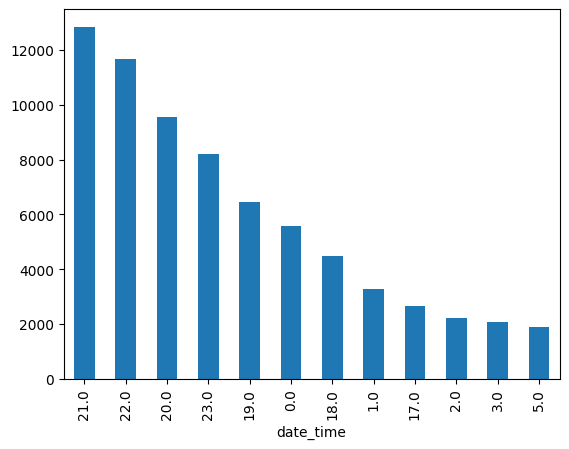

In [45]:
ufo.date_time.dt.hour.value_counts().head(12).plot(kind = "bar")

<Axes: xlabel='date_time'>

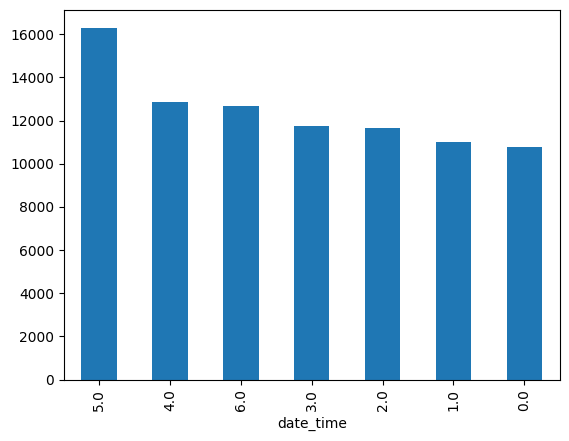

In [46]:
ufo.date_time.dt.dayofweek.value_counts().head(12).plot(kind = "bar")

<h3> Comparing Dates </h3>

In [56]:

ufo[ufo["date_time"] < "1970"].head(1) ## will not work if I give just day or just month

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
54,It was a full moon when my brother and I obser...,Lawrenceburg,KY,1969-06-01 21:00:00,disk,5 minutes,Occurred : 6/1/1969 21:00 (Entered as : 1969 ...,http://www.nuforc.org/webreports/049/S49947.html,It was a full moon when my brother and I obser...,2006-05-15T00:00:00,38.0052,-84.983


In [58]:
ufo[ufo["date_time"] > "23 Dec 1990"].head(1)

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12 18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22T00:00:00,37.343152,-77.408582


In [60]:
ufo[ufo["date_time"].dt.hour ==  0].head(1)

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
15,Strange bright light hovered over mobile home.,Gray Court,SC,1975-07-17,light,5 minutes,Occurred : 7/17/1975 00:00 (Entered as : 07/1...,http://www.nuforc.org/webreports/147/S147117.html,Strange bright light hovered over mobile home....,2019-07-05T00:00:00,34.5788,-82.1141


In [64]:
ufo[ufo["date_time"].between("1980", "1981")].sort_values("date_time").head(1)

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
7996,Very bright green light without sound moved ov...,Indianapolis,IN,1980-01-01 01:00:00,light,7 minutes,Occurred : 1/1/1980 01:00 (Entered as : 01/1/...,http://www.nuforc.org/webreports/056/S56902.html,Very bright green light without sound moved ov...,2007-06-12T00:00:00,39.807649,-86.142214


<h3> Finding starlynk Flybys in UFO dataset</h3>

In [65]:
ufo["date_time"].dt.date.value_counts().head(10)

date_time
2015-11-07    290
2014-07-04    270
2010-07-04    210
2012-07-04    200
2013-07-04    185
2015-07-04    178
2011-07-04    163
2009-09-19    129
2016-07-27    104
2014-01-01    103
Name: count, dtype: int64

In [68]:
recent_sightings = ufo[ufo["date_time"].dt.year > 2018]
recent_sightings["date_time"].dt.date.value_counts()

date_time
2019-11-11    77
2019-05-25    69
2019-05-26    67
2019-05-24    60
2019-07-04    57
              ..
2019-02-27     3
2019-01-17     3
2019-03-08     2
2019-12-29     1
2019-05-09     1
Name: count, Length: 357, dtype: int64

<h3> Date maths and time deltas </h3>

In [71]:
ufo[ufo["date_time"] > "2019-12-22"].head(1)

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
3892,Lights in a row. ((NUFORC Note: Starlink sat...,Rohnert Park,CA,2019-12-22 06:05:00,light,2 - 3 minutes,Occurred : 12/22/2019 06:05 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151866.html,Lights in a row Three of us saw 15 same shaped...,2019-12-22T00:00:00,38.343239,-122.704051


In [72]:
ufo["posted"] = pd.to_datetime(ufo["posted"])

In [73]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88125 entries, 0 to 88124
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   summary         88095 non-null  object        
 1   city            87888 non-null  object        
 2   state           82890 non-null  object        
 3   date_time       86938 non-null  datetime64[ns]
 4   shape           85627 non-null  object        
 5   duration        84951 non-null  object        
 6   stats           88088 non-null  object        
 7   report_link     88125 non-null  object        
 8   text            88070 non-null  object        
 9   posted          86938 non-null  datetime64[ns]
 10  city_latitude   72013 non-null  float64       
 11  city_longitude  72013 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(8)
memory usage: 8.1+ MB


In [75]:
ufo["time_before_reported"] = ufo["posted"] - ufo["date_time"] ## this will return a series where values are in form of timedelta

In [76]:
ufo.head(1)

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,time_before_reported
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12 18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22,37.343152,-77.408582,9 days 05:17:00


In [79]:
ufo.sort_values("time_before_reported", ascending = False).head(1)

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,time_before_reported
86762,An incomplete report given on behalf of anothe...,El Paso,TX,1969-06-01,other,3 minutes,Occurred : 6/1/1969 00:00 (Entered as : 1969 ...,http://www.nuforc.org/webreports/151/S151313.html,An incomplete report given on behalf of anothe...,2019-12-19,31.792328,-106.374849,18463 days


<h3> Billboard charts </h3>

In [83]:

charts = pd.read_csv("data/billboard_charts.csv", parse_dates= ["date"])

In [84]:
charts.head(1)

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3


<Axes: xlabel='artist'>

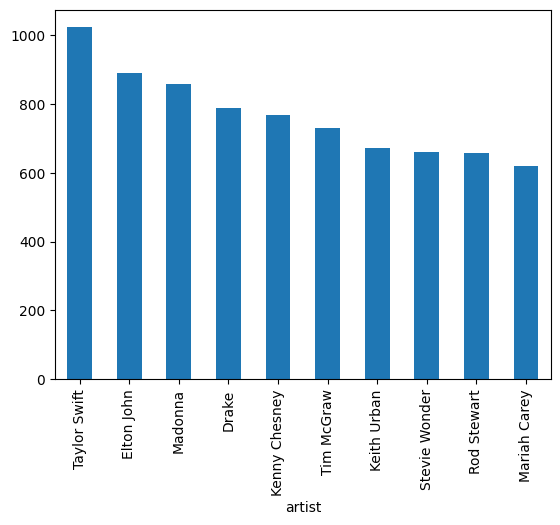

In [86]:
charts.artist.value_counts().head(10).plot(kind = "bar")

<Axes: xlabel='artist'>

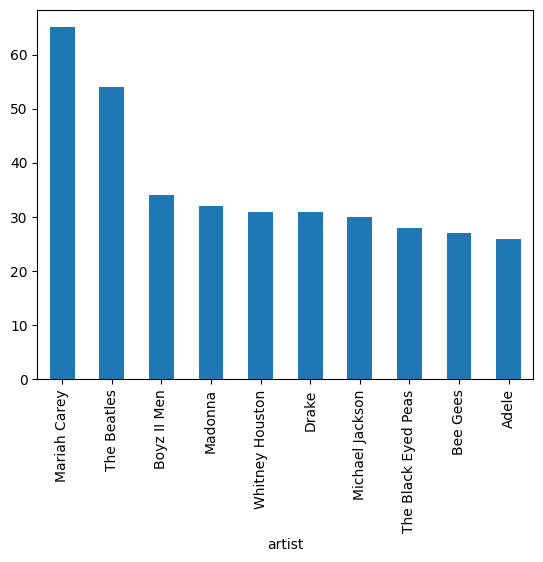

In [87]:
number_1s = charts["rank"] == 1
charts[number_1s].artist.value_counts().head(10).plot(kind = "bar")